In [48]:
import pandas as pd

In [63]:
df = pd.read_csv('files/final_chat.csv', sep=';', header=None, names=['date', 'time', 'author', 'message'])

In [65]:
# Clean up the 'date' column by removing non-numeric characters
df['date'] = df['date'].str.replace('[^0-9/]', '', regex=True)

# Convert the 'date' column to pandas datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

# Convert the 'time' column to pandas datetime format
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.time


In [64]:
# Remove unwanted authors

df = df[df['author'] != 'escolinha ']
df = df[df['author'] != 'Você']

In [66]:
df

,date,time,author,message
1,2021-10-18,16:53:02,Cerbino,Cerbino mudou o nome do grupo para “Silêncio m...
2,2021-10-18,16:54:40,Cerbino,Cerbino foi adicionado(a)
3,2021-10-18,16:54:40,vitin,vitin foi adicionado(a)
4,2021-10-18,16:54:40,Marco,Marco foi adicionado(a)
5,2021-10-18,16:54:40,Rivers cavalasso,Rivers cavalasso foi adicionado(a)
...,...,...,...,...
108614,2023-08-07,13:48:50,Alencar,Ter tem na vdd
108615,2023-08-07,13:48:54,Alencar,Mas sustente teus vícios
108616,2023-08-07,13:49:01,Alencar,Triste
108617,2023-08-07,13:49:05,Alencar,Bem triste


In [67]:
#the rank of author with most messages

df['author'].value_counts()

Alencar                  36389
Julin                    10796
Renzo Menezes             9156
Cerbino                   8553
Vinisso                   7178
João Bizzo                7020
Rafael Pedreiro           4482
Caio                      3908
Motinha                   3632
Perna                     3387
Big C                     3091
vitin                     2388
Brago                     1907
Marco                     1767
Rafael                    1358
NOVO MARCO NOVO HOMEM     1039
Almeida                    973
Vesgo                      641
Rivers cavalasso           623
Felps                      184
Leonardo El Madi           100
Name: author, dtype: int64

In [68]:
df['author'].unique()

array(['Cerbino', 'vitin', 'Marco', 'Rivers cavalasso', 'Julin',
       'Vinisso', 'Alencar', 'Brago', 'Caio', 'Rafael', 'João Bizzo',
       'Motinha', 'Perna', 'Big C', 'Rafael Pedreiro', 'Almeida',
       'Renzo Menezes', nan, 'NOVO MARCO NOVO HOMEM', 'Felps', 'Vesgo',
       'Leonardo El Madi'], dtype=object)

In [69]:
# Merge marco's messages
df['author'] = df['author'].replace('NOVO MARCO NOVO HOMEM', 'Marco')

# Merge rafa's messages
df['author'] = df['author'].replace('Rafael Pedreiro', 'Rafael')

# Merge vitin's messages
df['author'] = df['author'].replace('vitin', 'Vesgo')


In [70]:
#the rank of author with most messages

df['author'].value_counts()


Alencar             36389
Julin               10796
Renzo Menezes        9156
Cerbino              8553
Vinisso              7178
João Bizzo           7020
Rafael               5840
Caio                 3908
Motinha              3632
Perna                3387
Big C                3091
Vesgo                3029
Marco                2806
Brago                1907
Almeida               973
Rivers cavalasso      623
Felps                 184
Leonardo El Madi      100
Name: author, dtype: int64

In [71]:
group_message = df.groupby('author').count()
group_message.drop(columns=['date', 'time'], inplace=True)
group_message

,message
author,
Alencar,36387
Almeida,972
Big C,3091
Brago,1907
Caio,3907
Cerbino,8553
Felps,184
João Bizzo,7018
Julin,10796


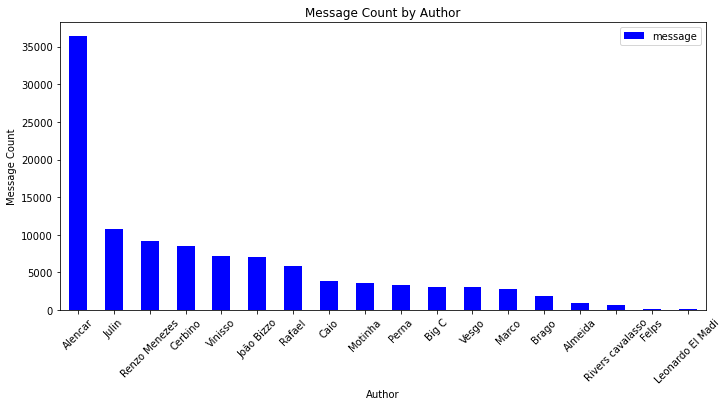

In [83]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'group_message' with columns 'author' and 'message_count'

# Create the bar plot in ascending order of 'message_count'
group_message.sort_values('message', ascending=False).plot.bar(color='blue')

# Add labels and title
plt.xlabel('Author')
plt.ylabel('Message Count')
plt.title('Message Count by Author')

# Make the plot nicer and bigger
plt.tight_layout()
plt.rcParams['figure.figsize'] = [20, 12]

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()